# __Competition 1 - Deadline Demons - Report__
---


## __Pipeline 1:__
### _Normalization --> Z Score --> 3 STD_

## Importing Data:

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import scipy

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [2]:
#create a pandas dataframe of the data

compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [3]:
#shows the (rows, columns) of our dataframe

compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [4]:
#shows basic summary statistics about the dataframe

compdata_original.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [5]:
#shows the data type of each column

compdata_original.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [6]:
#shows the median of each column

compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [7]:
#Create a copy of the data to use

compdata = compdata_original.copy()

In [8]:
#show the first 5 rows of the dataframe

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Variable Calculations:

In [9]:
# Impute the rows with '0' T2 values using mean
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [10]:
#replace the missing value in row 125 with the mean 

compdata.loc[125,'T2']=compdata['T2'].mean()

In [11]:
compdata.loc[125,'T2']

12758.606461086638

In [12]:
#replace the missing value in row 125 with the mean

compdata.loc[199,'T2']=compdata['T2'].mean()

In [13]:
compdata.loc[199,'T2']

12777.341566022154

In [14]:
#check to make sure there is no more '0' data in the dataframe

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [15]:
# check for negatives
# cannot have a negative number of long words (T5)

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [16]:
#replace the negative data with the mean

compdata.loc[7,'T5']=compdata['T5'].mean()

In [17]:
compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [18]:
# cannot have a negative number of positive words (S1)

compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [19]:
#replace the negaive data with the mean

compdata.loc[134,'S1']=compdata['S1'].mean()

In [20]:
compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [21]:
# Fill the 0, negative, and infinite values with the mean for continuous values
compdata['S1'].mean()

68.52337949935419

In [22]:
# Ratios:

#How to find the ratio for T1 and T2... impute them

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

In [23]:
#show the first 5 rows of the dataframe 

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.051395,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.061764,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.061630,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


# Missing Data:

In [24]:
#shows the number of records and their datatype in each field of the dataframe

compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [25]:
#shows the sum of na data in the dataframe by column

compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [26]:
# what is the percentage of missing data in each column?

compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
T3_         0.15
T4_         0.15
T5_         0.15
S1_         0.15
S2_         0.15
S3_         0.15
P(mid)      1.47
C3_         0.00
C5_         0.88
C6_         0.00
Y1          0.00
Y2          0.00
dtype: float64

In [27]:
#find errors in the I3 values

#isinstance(compdata['I3'], object) 

#compdata['I3'] = [isinstance(x, str) for x in compdata.I3]
#compdata

#compdata[compdata.I3.apply(lambda x: isinstance(x, str))]

In [28]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.059655,0.004513,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1


In [29]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.050882,0.005922,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1


In [30]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.056527,0.006539,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1


In [31]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.04157,0.0042,0.008835,0.00956,8.0,1,1.666667,0.0,1,1


In [32]:
#replacing sic codes with correct ones
compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [33]:
compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [34]:
compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [35]:
compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [36]:
compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [37]:
compdata["I3"] = pd.to_numeric(compdata["I3"])

In [38]:
#show where na values are in our dataframe

compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [39]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head(20)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,1.0
5,ACOM,Ancestry.com Inc.,7379.0,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,0.003445,0.005334,0.010056,13.5,1,5.724394,0.000000,0,1,1.0
6,ACOR,ACORDA THERAPEUTICS INC,2836.0,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,0.005204,0.006727,0.008567,12.0,0,3.463095,0.000000,1,1,1.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834.0,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,0.004899,0.010689,0.010868,13.0,0,2.421469,0.000000,1,0,0.0
8,ACTV,ACTIVE NETWORK INC,7372.0,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,0.003915,0.008371,0.015797,17.0,0,4.816591,0.000000,1,1,1.0
9,ACW,ACCURIDE CORP,3714.0,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,0.008868,0.009853,0.016094,18.0,1,3.056608,0.000000,1,0,1.0


In [40]:
#impute na values with the mean

compdata['Imputed_C7'] = compdata['C7'].fillna(compdata['C7'].mean())

In [41]:
#show where na values are in our dataframe

compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
Imputed_C7     0
dtype: int64

In [42]:
# Drop missing P Values from Continues DF

compdata = compdata.dropna(how='all', subset=['P(1Day)'])

In [43]:
# Create DF with only continuous features

# Drop the imputed variable colmuns
# Drop the P values
# Drop Y1 Y2 **make seperate df
    # Drop T1 and T2?

compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','T1', 'T2','T3','T4','T5','S1','S2','S3','C2','C3','C5','C6','C7','Imputed_C2','C3_','Y1','Y2'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111,51.345
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000,25.936
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000,7.378
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000,8.526
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000,632.298


In [44]:
#show where na values are in our dataframe

compdata_cont.isna().sum()

C1            0
C4            0
T3_           0
T4_           0
T5_           0
S1_           0
S2_           0
S3_           0
C5_           0
C6_           0
Imputed_C7    0
dtype: int64

In [45]:
# Create DF with only categorical features
# drop y1 y2 c2 i3

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1', 'I2', 'I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Y1','Y2', 'Imputed_C7'], axis=1)
compdata_cat.head()

,C3_,Imputed_C2
0,1,1.0
1,0,0.0
2,0,1.0
3,0,1.0
4,1,1.0


In [46]:
#create a DF with our target variables

targetvals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','Imputed_C2', 'Imputed_C7'], axis=1)
targetvals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


# Normalization

## Skewness 

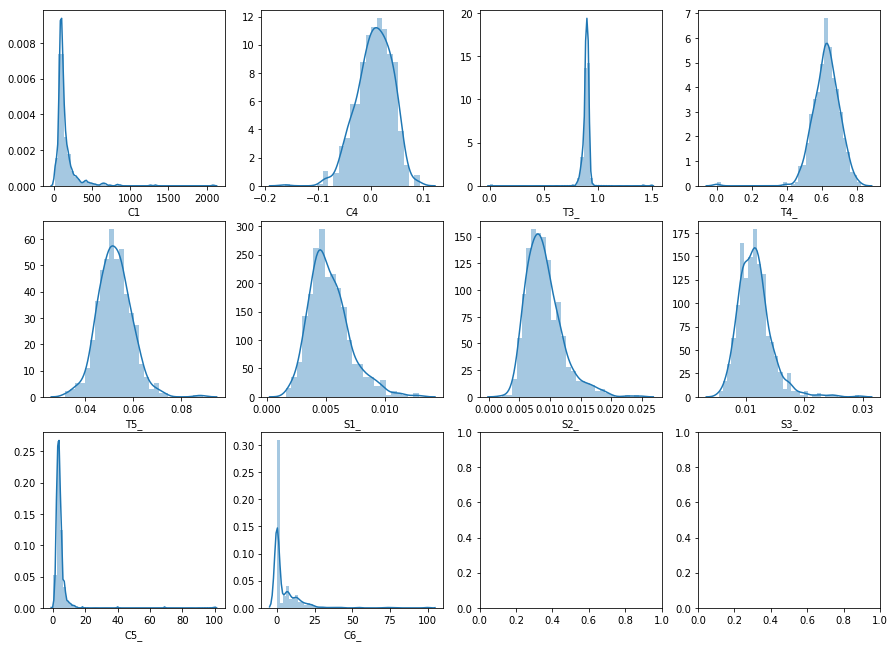

In [47]:
#import necessary packaages

import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(3, 4, figsize=(15,11), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 1])
plt.show()

In [48]:
# check if its left or right skewed

compdata_cont.skew()

C1             5.649485
C4            -0.477892
T3_           -7.196921
T4_           -1.595377
T5_            0.433959
S1_            0.933902
S2_            1.193276
S3_            1.387724
C5_           13.405536
C6_            4.372685
Imputed_C7    12.193190
dtype: float64

In [49]:
# Negative skew

compdata_cont['T3_'] = compdata_cont['T3_'].apply(np.exp)
compdata_cont['T3_'].skew()

1.8055748749425526

In [50]:
# Positive skew

compdata_cont['C1'] = compdata_cont['C1'].apply(np.log)
compdata_cont['C1'].skew()

0.13206924296483574

In [51]:
# Positive skew

compdata_cont['S1_'] = compdata_cont['S1_'].apply(np.log)
compdata_cont['S1_'].skew()

-0.12760336554646515

In [52]:
# Positive skew

compdata_cont['S2_'] = compdata_cont['S2_'].apply(np.log)
compdata_cont['S2_'].skew()

0.07780288815653288

In [53]:
# Positive skew

compdata_cont['C5_'] = compdata_cont['C5_'].apply(np.log)
compdata_cont['C5_'].skew()

0.4273718005667461

In [54]:
# Positive skew

compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'].skew()

0.798470359396379

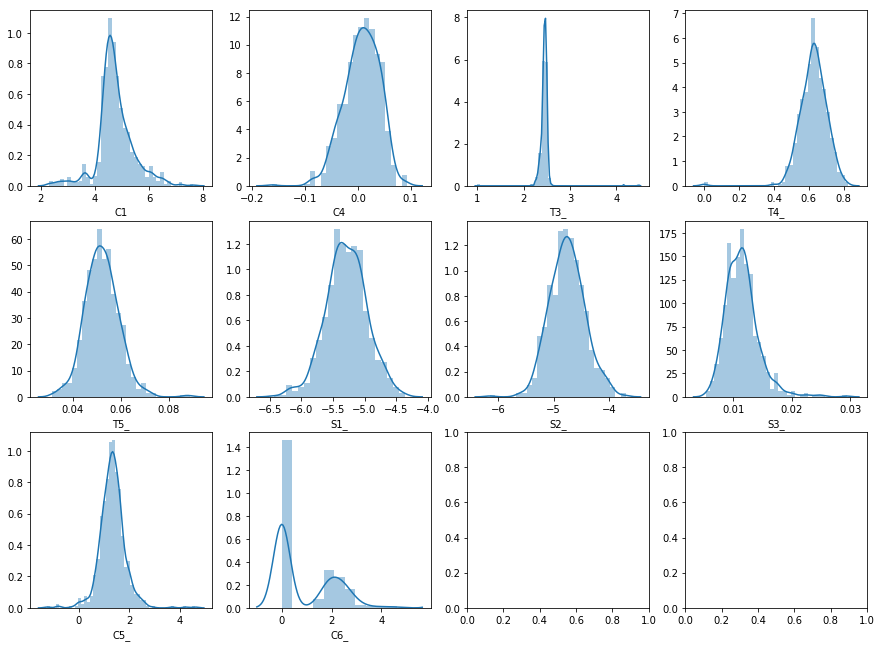

In [55]:
#import necessary packaages

import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(3, 4, figsize=(15,11), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 1])
plt.show()

# Z Score

In [56]:
#apply z score method of normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(compdata_cont))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [57]:
print(scaler.mean_)

[ 4.75771444e+00  7.28220142e-03  2.44435916e+00  6.26720235e-01
  5.22642407e-02 -5.28842092e+00 -4.75460867e+00  1.15159946e-02
  1.32167562e+00  8.72088573e-01  5.06358456e+02]


In [58]:
print(scaler.transform(compdata_cont))

[[ 0.06912902  0.65456608  0.24297671 ...  0.05931288  1.17431975
  -0.28753957]
 [ 1.19296038 -0.6197765   0.0791424  ...  2.29565278 -0.7533802
  -0.30359644]
 [-0.3850143   0.40347956  0.25065983 ... -0.21077066 -0.7533802
  -0.31532391]
 ...
 [-0.05854314  0.695147   -0.06669727 ... -0.04041052 -0.7533802
  -0.28495747]
 [-0.59864304  0.75098528  0.25165854 ...  0.23162797  1.5416445
  -0.24550821]
 [ 1.31466775  0.52279664  0.16872511 ... -0.28743307  0.87250491
   0.60869097]]


In [59]:
#see the first 5 rows of our adjusted dataframe

compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
0,4.804021,0.029074,2.481533,0.640426,0.054250,-5.323718,-4.688678,0.010929,1.351792,2.231443,51.345
1,5.556828,-0.013352,2.456467,0.644753,0.051395,-5.726618,-4.500360,0.010876,2.487306,0.000000,25.936
2,4.499810,0.020715,2.482708,0.636816,0.061764,-4.457393,-5.071759,0.011403,1.214656,0.000000,7.378
3,5.342334,0.020023,2.501924,0.539634,0.061630,-4.637032,-4.941521,0.013319,1.193831,0.000000,8.526
4,4.382027,-0.034895,2.431405,0.587413,0.048550,-5.399715,-4.600461,0.011261,1.315407,1.709976,632.298


In [60]:
#check that summary statistics have changed 

compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,4.757714,0.007282,2.444359,0.626720,0.052264,-5.288421,-4.754609,0.011516,1.321676,0.872089,506.358456
std,0.670366,0.033318,0.153109,0.077686,0.007075,0.324049,0.315538,0.002843,0.508141,1.158446,1583.637898
min,2.302585,-0.162352,1.000000,0.000000,0.031595,-6.436265,-6.141157,0.005326,-1.261521,0.000000,0.074000
25%,4.442651,-0.013927,2.419152,0.580329,0.047562,-5.488469,-4.966767,0.009579,1.047537,0.000000,41.458000
50%,4.672829,0.009125,2.452956,0.628861,0.051943,-5.290180,-4.758642,0.011301,1.316685,0.000000,133.102000
75%,5.045033,0.031571,2.483560,0.674461,0.056544,-5.074155,-4.554401,0.012848,1.580607,1.974023,500.459962
max,7.643483,0.092896,4.477127,0.826347,0.088960,-4.355265,-3.704811,0.029397,4.603040,4.641589,30683.000000


# 3 STD

In [61]:
#create and apply an upper bound to our dataframe

for col in compdata_cont.columns:
    u_bound = compdata_cont[col].mean() + 3* compdata_cont[col].std()
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [62]:
#create and apply a lower bound to our dataframe

for col in compdata_cont.columns:
    l_bound = compdata_cont[col].mean() - 3* compdata_cont[col].std()
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

In [63]:
#check that summary statistics have changed 


compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,4.758184,0.007388,2.445049,0.627913,0.052221,-5.288155,-4.754124,0.011469,1.319607,0.871197,436.702406
std,0.651530,0.032886,0.066587,0.070756,0.006898,0.323175,0.312467,0.002649,0.464293,1.155650,855.646551
min,2.770839,-0.092671,2.093423,0.393663,0.031595,-6.260567,-5.699664,0.005326,-0.125569,0.000000,0.074000
25%,4.442651,-0.013927,2.419152,0.580329,0.047562,-5.488469,-4.966767,0.009579,1.047537,0.000000,41.458000
50%,4.672829,0.009125,2.452956,0.628861,0.051943,-5.290180,-4.758642,0.011301,1.316685,0.000000,133.102000
75%,5.045033,0.031571,2.483560,0.674461,0.056544,-5.074155,-4.554401,0.012848,1.580607,1.974023,500.459962
max,6.768811,0.092896,2.903687,0.826347,0.073489,-4.355265,-3.807993,0.020045,2.846098,4.347425,5257.272150


# Correlation

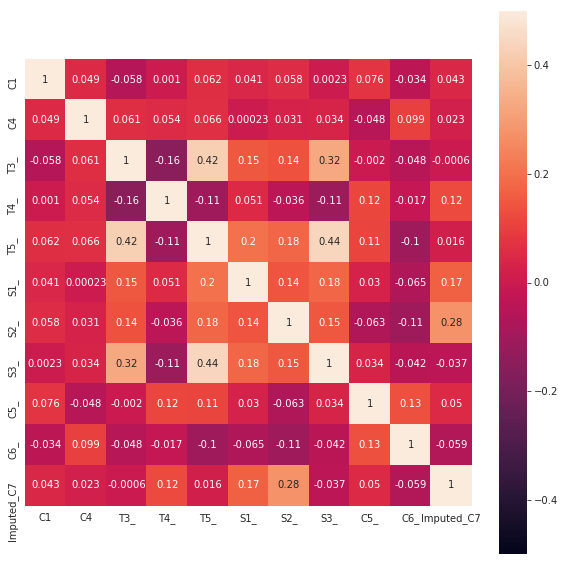

In [64]:
#create a correlation matrix to visualize the relation between our features

cont_corr=compdata_cont.corr()
with sns.axes_style('dark'):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(cont_corr, vmin=-.5, vmax=.5, square=True, annot=True)

In [65]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,4.758184,0.007388,2.445049,0.627913,0.052221,-5.288155,-4.754124,0.011469,1.319607,0.871197,436.702406
std,0.651530,0.032886,0.066587,0.070756,0.006898,0.323175,0.312467,0.002649,0.464293,1.155650,855.646551
min,2.770839,-0.092671,2.093423,0.393663,0.031595,-6.260567,-5.699664,0.005326,-0.125569,0.000000,0.074000
25%,4.442651,-0.013927,2.419152,0.580329,0.047562,-5.488469,-4.966767,0.009579,1.047537,0.000000,41.458000
50%,4.672829,0.009125,2.452956,0.628861,0.051943,-5.290180,-4.758642,0.011301,1.316685,0.000000,133.102000
75%,5.045033,0.031571,2.483560,0.674461,0.056544,-5.074155,-4.554401,0.012848,1.580607,1.974023,500.459962
max,6.768811,0.092896,2.903687,0.826347,0.073489,-4.355265,-3.807993,0.020045,2.846098,4.347425,5257.272150


In [66]:
compdata_cat.corr()

,C3_,Imputed_C2
C3_,1.000000,0.018219
Imputed_C2,0.018219,1.000000


In [67]:
compdata_cat.describe()

,C3_,Imputed_C2
count,660.000000,660.000000
mean,0.484848,0.859091
std,0.500149,0.348192
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


## Binning

In [68]:
#creating a function to bin the sic codes

def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2,Imputed_C7,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.010929,9.0,1,3.864345,11.111111,0,1,1.0,51.345,5
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.010876,9.0,0,12.028832,0.000000,1,0,0.0,25.936,5
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011403,13.0,0,3.369134,0.000000,1,0,1.0,7.378,5
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.013319,15.0,0,3.299697,0.000000,1,1,1.0,8.526,5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.011261,20.0,1,3.726269,5.000000,0,1,1.0,632.298,6


# Feature Selection

### Since none of the features have a correlation greater than |.5|, all of the data will remain in the dataset.

In [69]:
P1compdata_final=pd.concat([compdata_cont, compdata_cat, targetvals], axis=1)
P1compdata_final.describe

<bound method NDFrame.describe of            C1        C4       T3_       T4_       T5_       S1_       S2_  \
0    4.804021  0.029074  2.481533  0.640426  0.054250 -5.323718 -4.688678   
1    5.556828 -0.013352  2.456467  0.644753  0.051395 -5.726618 -4.500360   
2    4.499810  0.020715  2.482708  0.636816  0.061764 -4.457393 -5.071759   
3    5.342334  0.020023  2.501924  0.539634  0.061630 -4.637032 -4.941521   
4    4.382027 -0.034895  2.431405  0.587413  0.048550 -5.399715 -4.600461   
..        ...       ...       ...       ...       ...       ...       ...   
677  5.758902  0.004670  2.511681  0.612663  0.050603 -5.034037 -4.836506   
678  4.584967  0.058689  2.474968  0.647177  0.056770 -5.284653 -4.696866   
679  4.718499  0.030425  2.434155  0.647761  0.047976 -5.474811 -4.705677   
680  4.356709  0.032284  2.482861  0.710938  0.043178 -4.994816 -5.228431   
681  5.638355  0.024687  2.470173  0.670702  0.054545 -4.820625 -4.729190   

          S3_       C5_       C6_  Impute

In [70]:
#write the dataframe as a csv so we can split it into training and testing data

P1compdata_final.to_csv('../project1-deadlinedemons/P1compdata_final.csv')

In [71]:
#drop target values out of the dataset

df=pd.read_csv('../project1-deadlinedemons/P1compdata_final.csv', header=0, index_col=0)
df.head()
X = df.drop('Y1',1).values # drop target variable
y1 = df['Y1'].values

In [72]:
#split up the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)

In [73]:
#run KNN classifier and show the accuracy

from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.598485


In [74]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.57        67
           1       0.58      0.68      0.62        65

    accuracy                           0.60       132
   macro avg       0.60      0.60      0.60       132
weighted avg       0.60      0.60      0.60       132



---

## __Pipeline 2:__
### _IQR --> Min Max --> Normalization_

---

## __Pipeline 3:__
### _Min Max --> Normalization --> 3 STD_
### _IQR --> Normalization --> Z Score_

---